## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import r2_score,accuracy_score


## Import the data

In [3]:
Fraud_check = pd.read_csv('Fraud_check.csv')
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Data Understanding

In [4]:
Fraud_check.shape

(600, 6)

In [5]:
Fraud_check.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [6]:
Fraud_check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
Fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## Data Preparation

In [8]:
Fraud_check["income"]="<=30000"
Fraud_check.loc[Fraud_check["Taxable.Income"]>=30000,"income"]="Good"
Fraud_check.loc[Fraud_check["Taxable.Income"]<=30000,"income"]="Risky"

In [9]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [10]:
pd.set_option("max_rows",None)

In [11]:
Fraud_check.shape

(600, 7)

In [12]:
del Fraud_check['Taxable.Income']

In [13]:
Fraud_check.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [14]:
Fraud_check

,undergrad,marital,population,experience,urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
5,NO,Divorced,116382,0,NO,Good
6,NO,Divorced,80890,8,YES,Good
7,YES,Single,131253,3,YES,Good
8,NO,Single,102481,12,YES,Good
9,YES,Divorced,155482,4,YES,Good


In [15]:
Fraud_check.shape

(600, 6)

## Model Building

In [16]:
Fraud_Label = LabelEncoder()
Fraud_check['undergrad'] = Fraud_Label.fit_transform(Fraud_check['undergrad'])
Fraud_check['marital'] = Fraud_Label.fit_transform(Fraud_check['marital'])
Fraud_check['urban'] = Fraud_Label.fit_transform(Fraud_check['urban'])
Fraud_check['income'] = Fraud_Label.fit_transform(Fraud_check['income'])

In [17]:
Fraud_check

,undergrad,marital,population,experience,urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
5,0,0,116382,0,0,0
6,0,0,80890,8,1,0
7,1,2,131253,3,1,0
8,0,2,102481,12,1,0
9,1,0,155482,4,1,0


In [18]:
X = Fraud_check.drop(['income'],axis=1)
y = Fraud_check['income']

In [19]:
X

,undergrad,marital,population,experience,urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
5,0,0,116382,0,0
6,0,0,80890,8,1
7,1,2,131253,3,1
8,0,2,102481,12,1
9,1,0,155482,4,1


In [20]:
y

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     0
12     1
13     0
14     0
15     0
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     1
29     0
30     0
31     0
32     0
33     0
34     1
35     0
36     1
37     0
38     1
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     1
54     0
55     1
56     0
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     0
66     0
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     1
80     0
81     0
82     0
83     0
84     0
85     1
86     0
87     1
88     0
89     1
90     0
91     0
92     0
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    0
109    0
110    1
1

In [21]:
X.shape,y.shape

((600, 5), (600,))

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((480, 5), (120, 5), (480,), (120,))

## Model Training

In [23]:
Fraund_Dt = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_split=2)
Fraund_Dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Model Testing

In [24]:
y_pred_train = Fraund_Dt.predict(X_train)
y_pred_test  = Fraund_Dt.predict(X_test)

In [25]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Model Evaluation

In [27]:
print("Train R2 Score       :",round(r2_score(y_train,y_pred_train),4))
print("Train Accuracy Score :",round(accuracy_score(y_train,y_pred_train),4))

Train R2 Score       : 0.1094
Train Accuracy Score : 0.8417


In [28]:
print("Test R2 Score       :",round(r2_score(y_test,y_pred_test),4))
print("Test Accuracy Score :",round(accuracy_score(y_test,y_pred_test),4))

Test R2 Score       : -0.8979
Test Accuracy Score : 0.8167


## DT- Graph

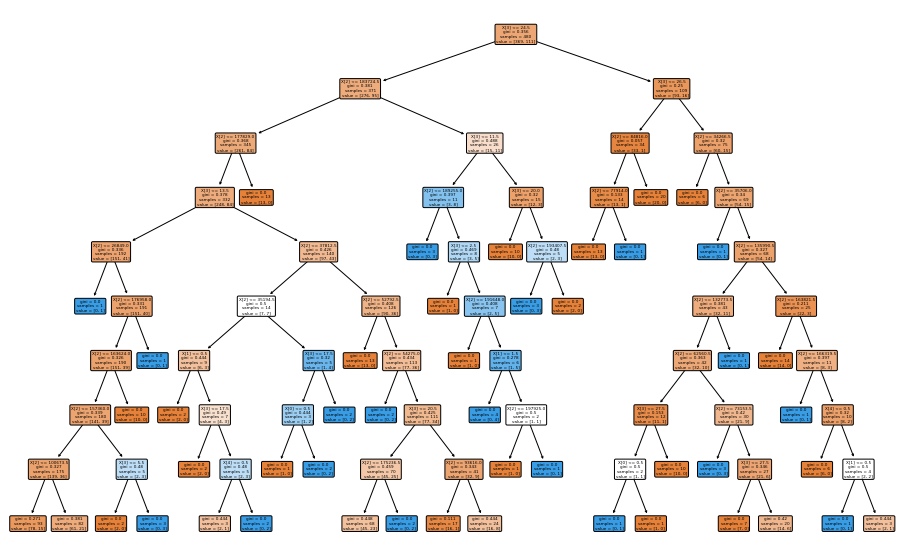

In [30]:
plt.figure(figsize=(16,10))
plot_tree(Fraund_Dt,rounded=True,filled=True)
plt.show()

## Model Depolyment

In [117]:
from pickle import dump
dump(Fraund_Dt,open("Fraund_Dt.pkl",'wb'))

In [119]:
from pickle import load
Fraud_load = load(open("Fraund_Dt.pkl",'rb'))

In [120]:
Fraud_load.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])